### Daily Transaction Completeness Check

This code cell verifies that **every calendar day** between the earliest and latest `invoice_date`
is represented in the data.  
Steps performed:

1. **Normalize timestamps** – sets each `invoice_date` to midnight so duplicates like `2023‑01‑02 00:00`
   and `2023‑01‑02 12:34` collapse into the same date.
2. **Count daily transactions** – `groupby` the date and tally the number of rows per day.
3. **Generate full calendar range** – builds a `DatetimeIndex` that covers every day in the span.
4. **Detect missing days** – calculates the difference between the full range and the days
   actually present in the data.
5. **Print missing days** – lists any dates with zero transactions and reports the total.


| Variable                                                                            | Scale        | Rationale                                                                                                   |
| ----------------------------------------------------------------------------------- | ------------ | ----------------------------------------------------------------------------------------------------------- |
| `invoice_no`                                                                        | **Nominal**  | Unique ID; numbers have no arithmetic meaning.                                                              |
| `customer_id`                                                                       | **Nominal**  | Categorical identifier, not ordered.                                                                        |
| `gender`                                                                            | **Nominal**  | Two (or more) unordered categories.                                                                         |
| `age`                                                                               | **Ratio**    | Continuous, true zero (new-born age = 0), meaningful ratios (40 yr is twice 20 yr).                         |
| `category`                                                                          | **Nominal**  | Product groups with no inherent order.                                                                      |
| `quantity`                                                                          | **Ratio**    | Count of items; zero means none, and 10 is twice 5.                                                         |
| `price`                                                                             | **Ratio**    | Monetary amount; zero is meaningful, ratios make sense.                                                     |
| `payment_method`                                                                    | **Nominal**  | Cash / Credit / Debit etc. are unordered labels.                                                            |
| `invoice_date`                                                                      | **Interval** | Dates carry equal, ordered spacing (one day), but zero-point (epoch) is arbitrary; only differences matter. |
| `shopping_mall`                                                                     | **Nominal**  | Mall names – pure categories.                                                                               |
| `season`                                                                            | **Nominal**  | Spring / Summer / … are cyclical but not ranked.                                                            |
| `is_weekday`, `is_holiday`                                                          | **Nominal**  | Binary flags (0/1) denote categories, not magnitude.                                                        |
| `Econ_Conf`, `Cons_Conf`, `RealSec_Conf`, `Serv_Conf`, `Retail_Conf`, `Constr_Conf` | **Interval** | Index values: equal intervals meaningful, but zero is an arbitrary baseline; 120 isn’t “twice” 60.          |


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

df = pd.read_csv("../datasets/customer_shopping_data_v14.csv")
sns.set_theme(style="whitegrid")

color1 = '#FF9E9D'  # Coral Pink
color2 = '#FFC785'  # Peach
color3 = '#FFF59D'  # Light Lemon
color4 = '#A0E6A6'  # Mint Green
color5 = '#87C8FF'  # Sky Blue
color6 = '#C4A2FF'  # Lavender

In [3]:
# Ensure invoice_date is datetime and add Year/Month columns
df['invoice_date'] = pd.to_datetime(df['invoice_date'])
df['Year'] = df['invoice_date'].dt.year
df['Month'] = df['invoice_date'].dt.month


In [47]:
# Visualize data.
invoice_counts = df['invoice_no'].value_counts()
top_10_invoice = invoice_counts.head(10)

if (top_10_invoice == 1).all():
    print("All invoice_no values are unique.")
else:
    print(top_10_invoice)
    plt.figure(figsize=(10, 4), dpi=150)
    top_10_invoice.plot(kind='bar', color=color1)
    plt.title('Top 10 Repeated Invoice Numbers')
    plt.xlabel('Invoice No')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.savefig('dataset_frequency_and_distribution_analysis/invoice_counts_top_10.png', dpi=150)
    plt.show()

All invoice_no values are unique.


In [48]:
# Visualize data.
customer_counts = df['customer_id'].value_counts()
top_10_customer = customer_counts.head(10)

if (top_10_customer == 1).all():
    print("All customer_id values are unique.")
else:
    print(top_10_customer)
    plt.figure(figsize=(10, 4), dpi=150)
    top_10_customer.plot(kind='bar', color=color1)
    plt.title('Top 10 Repeated Customer IDs')
    plt.xlabel('Customer ID')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.savefig('dataset_frequency_and_distribution_analysis/customer_counts_top_10.png', dpi=150)
    plt.show()

All customer_id values are unique.


Number of unique duplicate baskets: 22995


,gender,age,category,quantity,price,payment_method,shopping_mall,total_price,Count
0,Female,29,Clothing,2,600.16,Cash,Mall of Istanbul,1200.32,18
1,Female,61,Clothing,4,1200.32,Cash,Mall of Istanbul,4801.28,16
2,Female,64,Clothing,5,1500.40,Cash,Mall of Istanbul,7502.00,16
3,Female,43,Clothing,5,1500.40,Cash,Kanyon,7502.00,16
4,Female,51,Clothing,3,900.24,Cash,Mall of Istanbul,2700.72,15
...,...,...,...,...,...,...,...,...,...
22990,Female,55,Food & Beverage,3,15.69,Cash,Kanyon,47.07,2
22991,Female,55,Food & Beverage,3,15.69,Cash,Metrocity,47.07,2
22992,Female,55,Food & Beverage,3,15.69,Cash,Metropol AVM,47.07,2
22993,Female,55,Food & Beverage,3,15.69,Credit Card,Forum Istanbul,47.07,2


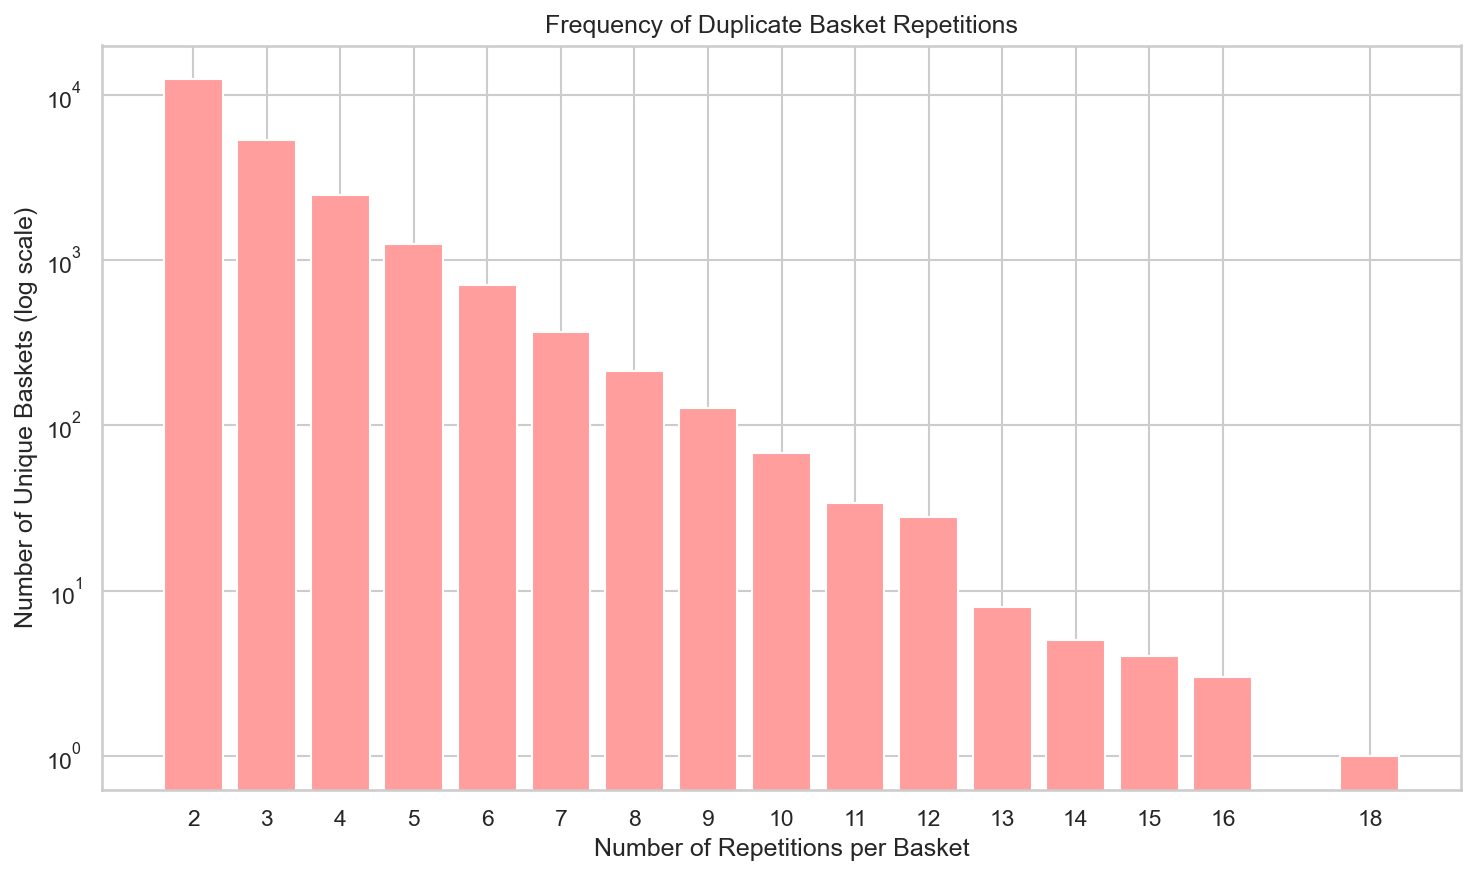


Repetition Counts:
2 repetitions: 12361 baskets
3 repetitions: 5342 baskets
4 repetitions: 2479 baskets
5 repetitions: 1251 baskets
6 repetitions: 702 baskets
7 repetitions: 369 baskets
8 repetitions: 212 baskets
9 repetitions: 128 baskets
10 repetitions: 68 baskets
11 repetitions: 34 baskets
12 repetitions: 28 baskets
13 repetitions: 8 baskets
14 repetitions: 5 baskets
15 repetitions: 4 baskets
16 repetitions: 3 baskets
18 repetitions: 1 baskets


In [23]:
# Define basket columns
basket_cols = [
    "gender",
    "age",
    "category",
    "quantity",
    "price",
    "payment_method",
    "shopping_mall",
    "total_price"
]

# Group by basket columns and count occurrences
basket_patterns = (
    df.groupby(basket_cols)
      .size()
      .reset_index(name="Count")
)

# Filter to show only duplicates
duplicate_baskets = basket_patterns[basket_patterns["Count"] > 1]

# Sort descending
top_baskets = duplicate_baskets.sort_values("Count", ascending=False).reset_index(drop=True)

# Display number of duplicate baskets
print("Number of unique duplicate baskets:", len(duplicate_baskets))

# Display the entire DataFrame
display(top_baskets)

# Count frequency of repetition counts
repeat_freq = top_baskets["Count"].value_counts().sort_index()

# Plot
plt.figure(figsize=(10,6), dpi=150)
plt.bar(repeat_freq.index, repeat_freq.values, color=color1)
plt.xlabel("Number of Repetitions per Basket")
plt.ylabel("Number of Unique Baskets (log scale)")
plt.title("Frequency of Duplicate Basket Repetitions")
plt.yscale("log")

ax = plt.gca()

# Force all ticks
ax.set_xticks(repeat_freq.index)
ax.set_xticklabels([str(tick) for tick in repeat_freq.index], minor=False)

plt.tight_layout()
plt.show()

# Print frequencies under the plot
print("\nRepetition Counts:")
for repetition, count in repeat_freq.items():
    print(f"{repetition} repetitions: {count} baskets")

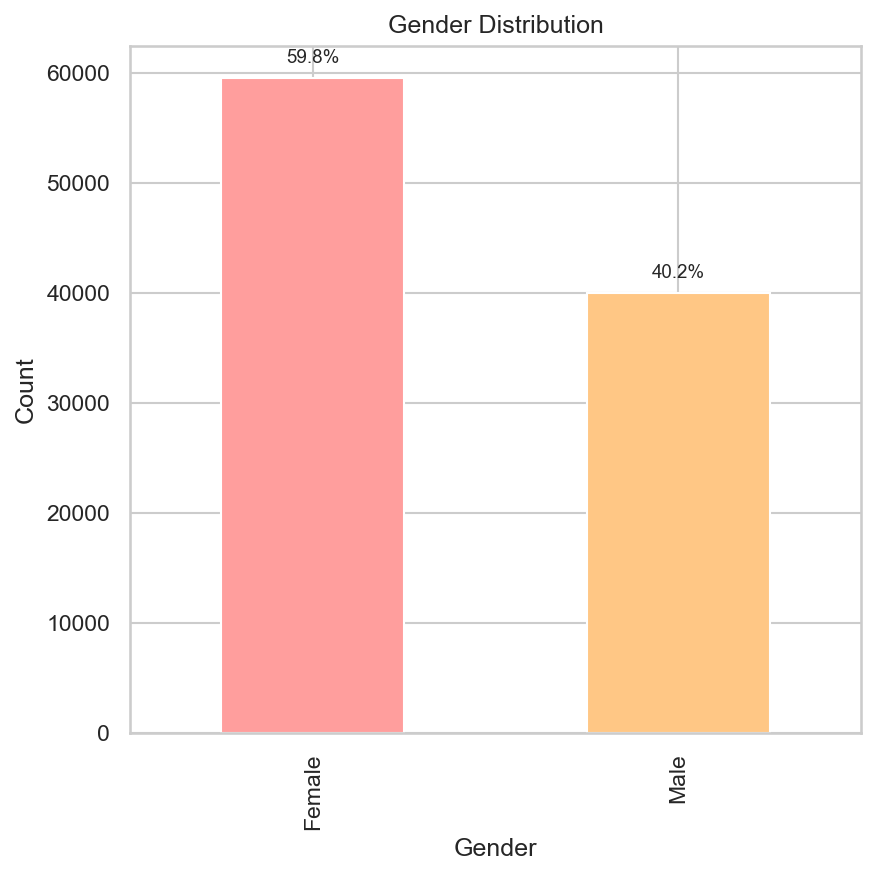

In [49]:
# Visualize data.
gender_counts = df['gender'].value_counts()
total = gender_counts.sum()
percentages = gender_counts / total * 100

plt.figure(figsize=(6, 6), dpi=150)
bars = gender_counts.plot(kind='bar', color=[color1, color2])

plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

for bar, pct in zip(bars.patches, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + total*0.01, f'{pct:.1f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('dataset_frequency_and_distribution_analysis/gender_distribution.png', dpi=150)
plt.show()

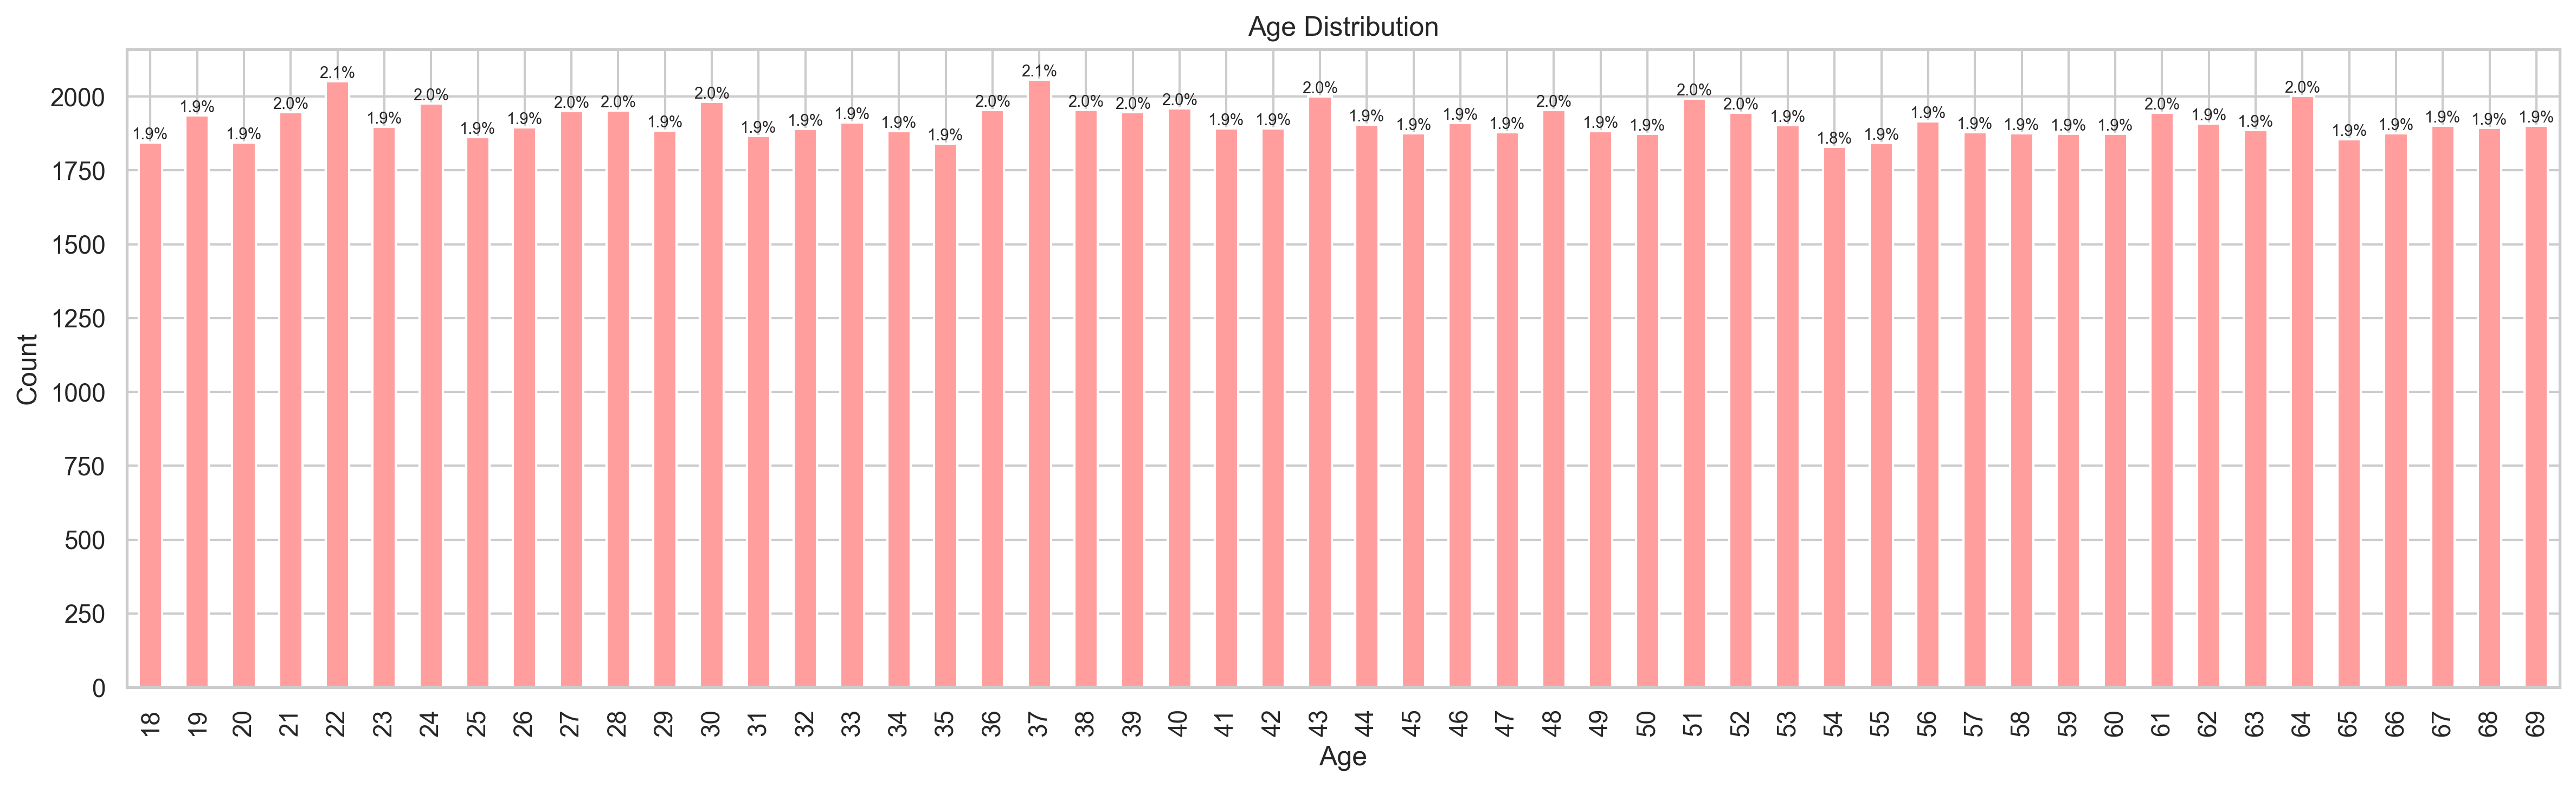

Min Age: 18
Max Age: 69
Mean Age: 43.4271
Standard Deviation: 14.9901


In [50]:
# Visualize data.
age_counts = df['age'].value_counts().sort_index()
total = age_counts.sum()
percentages = age_counts / total * 100

plt.figure(figsize=(16, 5), dpi=300)
bars = age_counts.plot(kind='bar', color=color1)

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

for bar, pct in zip(bars.patches, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height , f'{pct:.1f}%', ha='center', va='bottom', fontsize=7)

plt.tight_layout()
plt.savefig('dataset_frequency_and_distribution_analysis/age_distribution.png', dpi=300)
plt.show()

min_age = df['age'].min()
max_age = df['age'].max()
mean_age = df['age'].mean()
std_age = df['age'].std()

print(f"Min Age: {min_age}")
print(f"Max Age: {max_age}")
print(f"Mean Age: {mean_age:.4f}")
print(f"Standard Deviation: {std_age:.4f}")

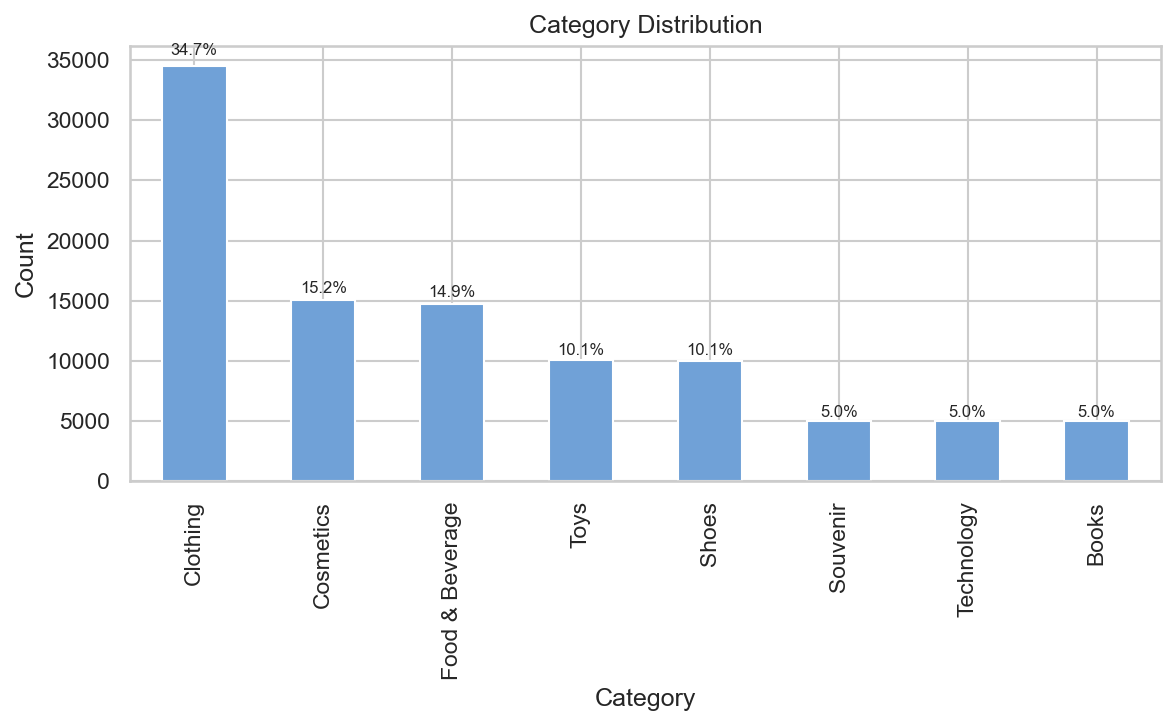

In [51]:
# Visualize data.
category_counts = df['category'].value_counts()
total = category_counts.sum()
percentages = category_counts / total * 100

plt.figure(figsize=(8, 5), dpi=150)
bars = category_counts.plot(kind='bar', color='#70a1d7')

plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')

for bar, pct in zip(bars.patches, percentages):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height * 1.02, 
        f'{pct:.1f}%',
        ha='center',
        va='bottom',
        fontsize=8
    )

plt.tight_layout()
plt.savefig('dataset_frequency_and_distribution_analysis/category_distribution.png', dpi=150)
plt.show()


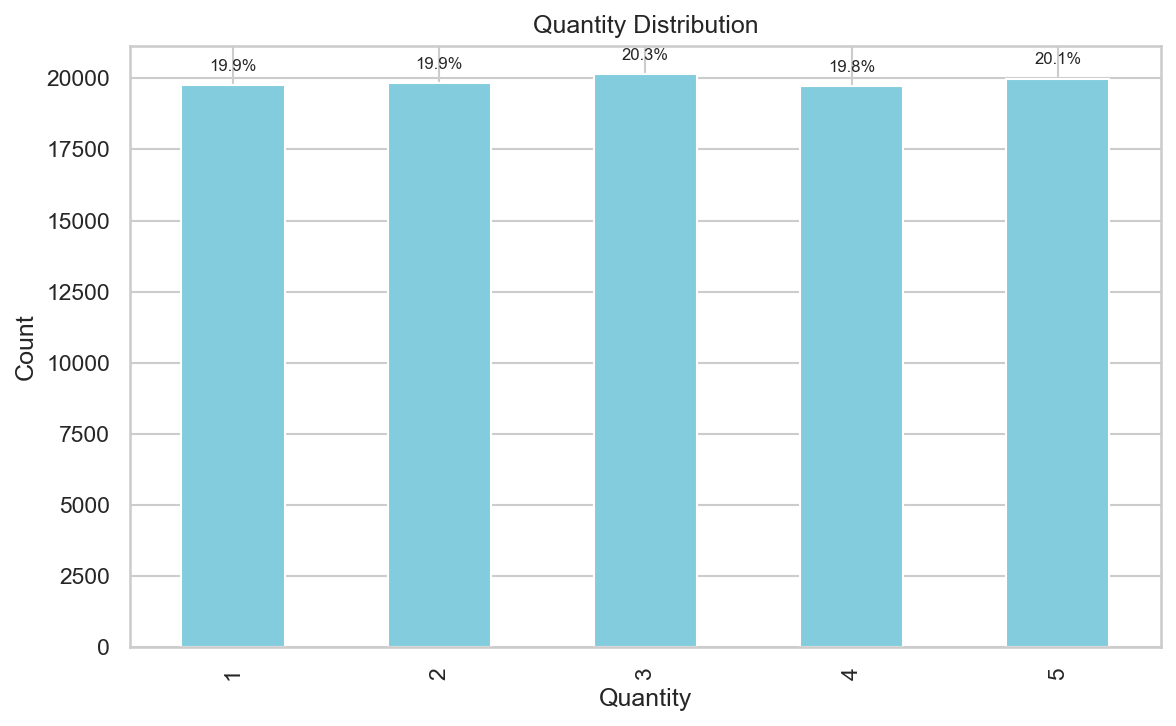

Mode Quantity: 3
Median Quantity: 3.0
Mean Quantity: 3.0034
Standard Deviation: 1.4130


In [52]:
# Visualize data.
quantity_counts = df['quantity'].value_counts().sort_index()
total = quantity_counts.sum()
percentages = quantity_counts / total * 100

plt.figure(figsize=(8, 5), dpi=150)
bars = quantity_counts.plot(kind='bar', color='#82ccdd')

plt.title('Quantity Distribution')
plt.xlabel('Quantity')
plt.ylabel('Count')

for bar, pct in zip(bars.patches, percentages):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height * 1.02,
        f'{pct:.1f}%',
        ha='center',
        va='bottom',
        fontsize=8
    )

plt.tight_layout()
plt.savefig('dataset_frequency_and_distribution_analysis/quantity_distribution.png', dpi=150)
plt.show()

mode_quantity = df['quantity'].mode().iloc[0]
median_quantity = df['quantity'].median()
mean_quantity = df['quantity'].mean()
std_quantity = df['quantity'].std()

print(f"Mode Quantity: {mode_quantity}")
print(f"Median Quantity: {median_quantity}")
print(f"Mean Quantity: {mean_quantity:.4f}")
print(f"Standard Deviation: {std_quantity:.4f}")


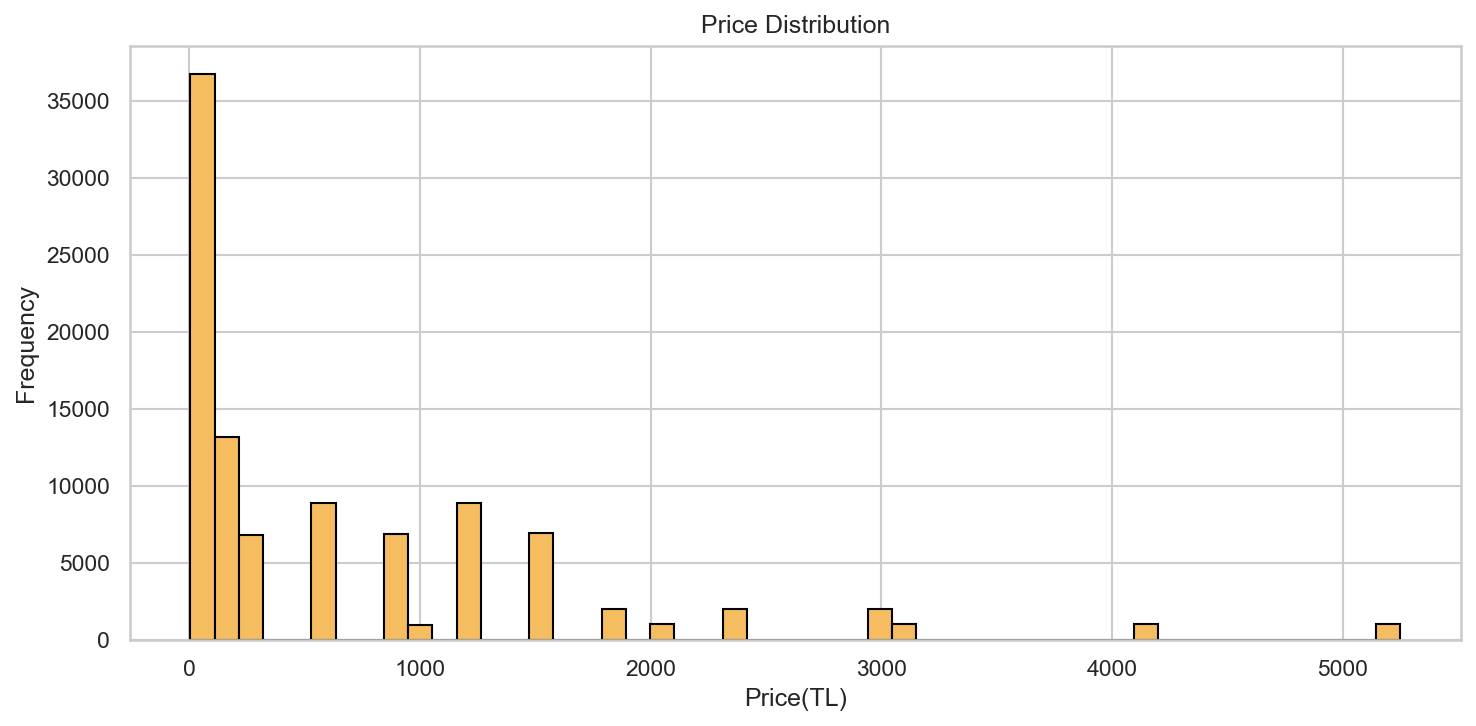

Min Price(TL): 5.2300
Max Price(TL): 5250.0000
Mean Price(TL): 689.2563
Median Price(TL): 203.3000
Mode Price(TL): 600.1600
Standard Deviation: 941.1846


In [53]:
# Execute data processing step.
plt.figure(figsize=(10, 5), dpi=150)
plt.hist(df['price'], bins=50, color='#f6bd60', edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price(TL)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('dataset_frequency_and_distribution_analysis/price_histogram.png', dpi=150)
plt.show()

price_min = df['price'].min()
price_max = df['price'].max()
price_mean = df['price'].mean()
price_median = df['price'].median()
price_mode = df['price'].mode().iloc[0]
price_std = df['price'].std()

print(f"Min Price(TL): {price_min:.4f}")
print(f"Max Price(TL): {price_max:.4f}")
print(f"Mean Price(TL): {price_mean:.4f}")
print(f"Median Price(TL): {price_median:.4f}")
print(f"Mode Price(TL): {price_mode:.4f}")
print(f"Standard Deviation: {price_std:.4f}")

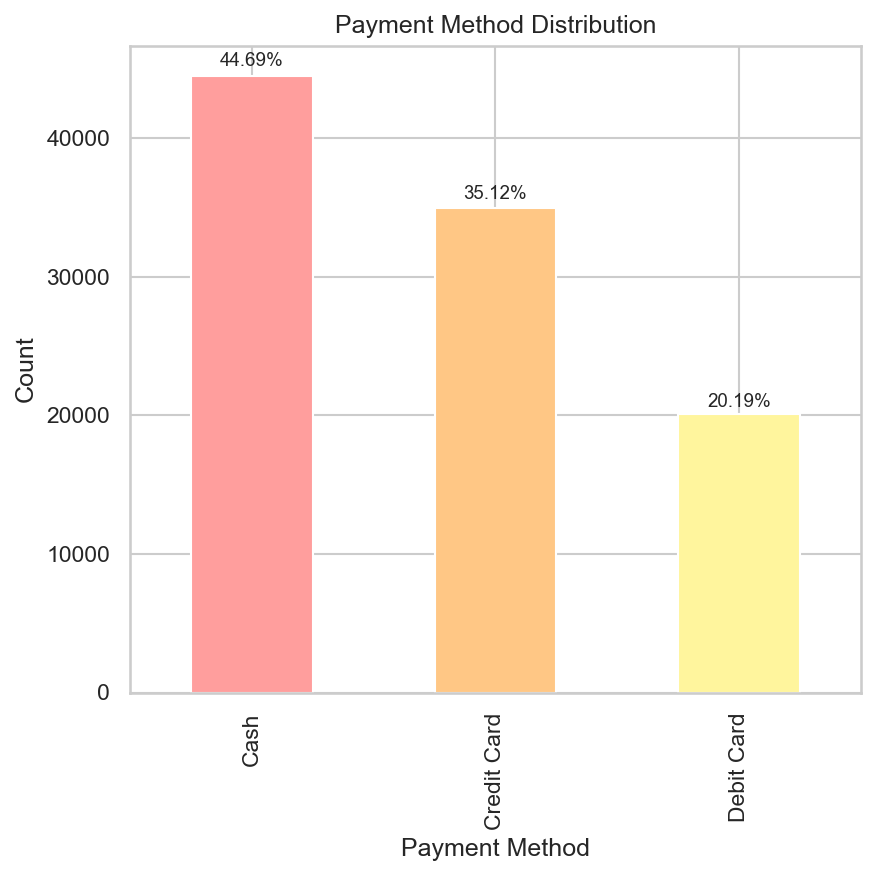

In [54]:
# Visualize data.
payment_counts = df['payment_method'].value_counts()
total = payment_counts.sum()
percentages = payment_counts / total * 100

plt.figure(figsize=(6, 6), dpi=150)
bars = payment_counts.plot(kind='bar', color=[color1, color2, color3])
plt.title('Payment Method Distribution')
plt.xlabel('Payment Method')
plt.ylabel('Count')

for bar, pct in zip(bars.patches, percentages):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height * 1.01,
        f'{pct:.2f}%',
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.tight_layout()
plt.savefig('dataset_frequency_and_distribution_analysis/payment_method_distribution.png', dpi=150)
plt.show()


Daily transaction count statistics:
  Mean  : 124.79
  Median: 124
  Mode  : 121
  Std   : 10.92


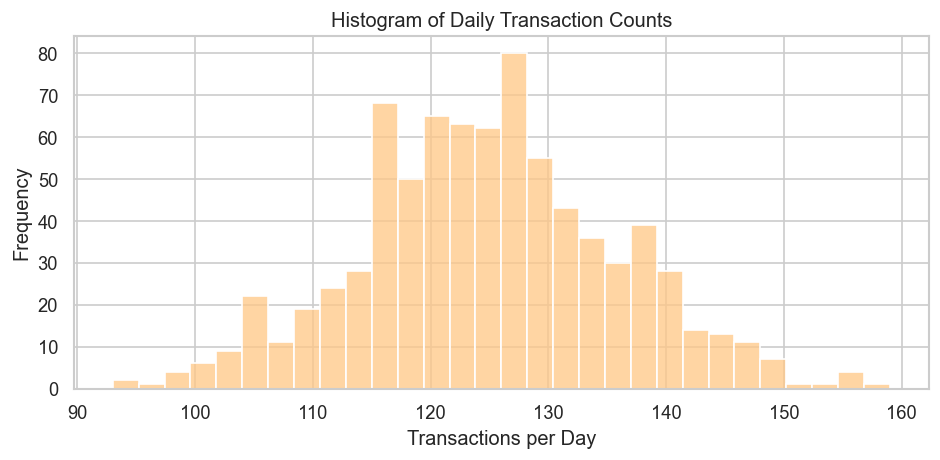

In [55]:
# Daily transaction counts and descriptive statistics + histogram
daily_txn = df.groupby('invoice_date').size()
print('Daily transaction count statistics:')
print(f'  Mean  : {daily_txn.mean():.2f}')
print(f'  Median: {daily_txn.median():.0f}')
print(f'  Mode  : {daily_txn.mode().iloc[0]}')
print(f'  Std   : {daily_txn.std():.2f}')

plt.figure(figsize=(8,4), dpi=120)
sns.histplot(daily_txn, bins=30, color=color2)
plt.title('Histogram of Daily Transaction Counts')
plt.xlabel('Transactions per Day')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('dataset_frequency_and_distribution_analysis/daily_transaction_histogram.png', dpi=150)
plt.show()


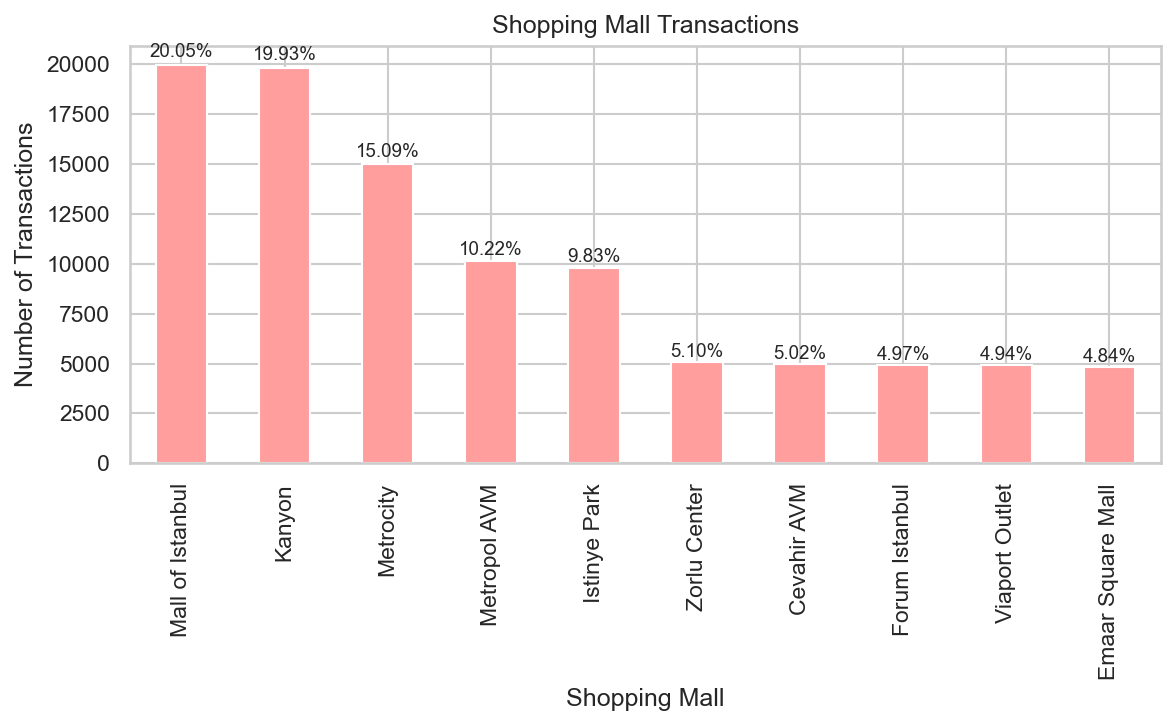

Mode Shopping Mall: Mall of Istanbul


In [56]:
# Visualize data.
mall_counts = df['shopping_mall'].value_counts()
total = mall_counts.sum()
percentages = mall_counts / total * 100

plt.figure(figsize=(8, 5), dpi=150)
bars = mall_counts.plot(kind='bar', color=color1)
plt.title('Shopping Mall Transactions')
plt.xlabel('Shopping Mall')
plt.ylabel('Number of Transactions')

for bar, pct in zip(bars.patches, percentages):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height * 1.01,
        f'{pct:.2f}%',
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.tight_layout()
plt.savefig('dataset_frequency_and_distribution_analysis/shopping_mall_transactions_distributiond.png', dpi=150)
plt.show()

print(f"Mode Shopping Mall: {df['shopping_mall'].mode().iloc[0]}")


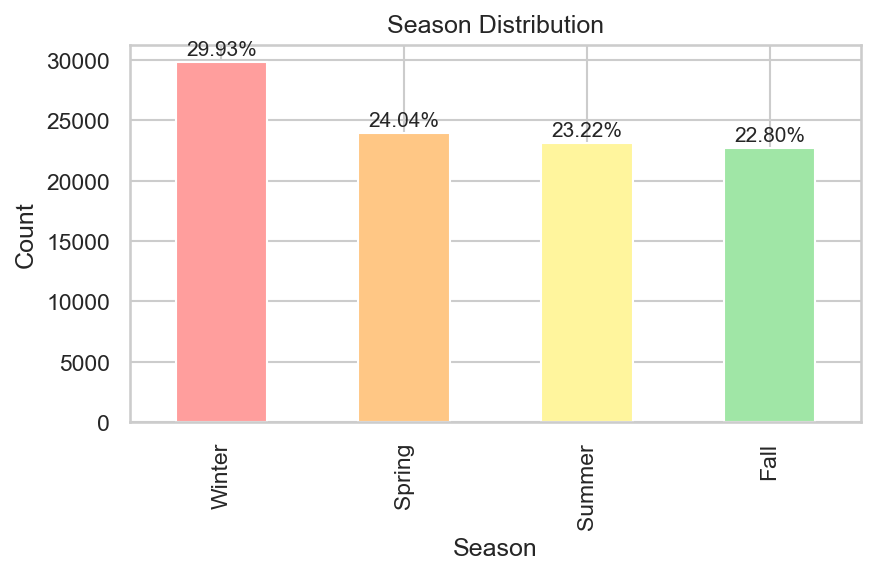

Mode of season: Winter


In [57]:
# Visualize data.
counts = df['season'].value_counts()
total = counts.sum()
percentages = counts / total * 100

plt.figure(figsize=(6,4), dpi=150)
bars = counts.plot(kind='bar', color=[color1, color2, color3, color4][:len(counts)])
plt.title('Season Distribution')
plt.xlabel('Season')
plt.ylabel('Count')

for bar, pct in zip(bars.patches, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height * 1.01, f'{pct:.2f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('dataset_frequency_and_distribution_analysis/season_distribution.png', dpi=150)
plt.show()

print(f"Mode of season: {df['season'].mode().iloc[0]}")

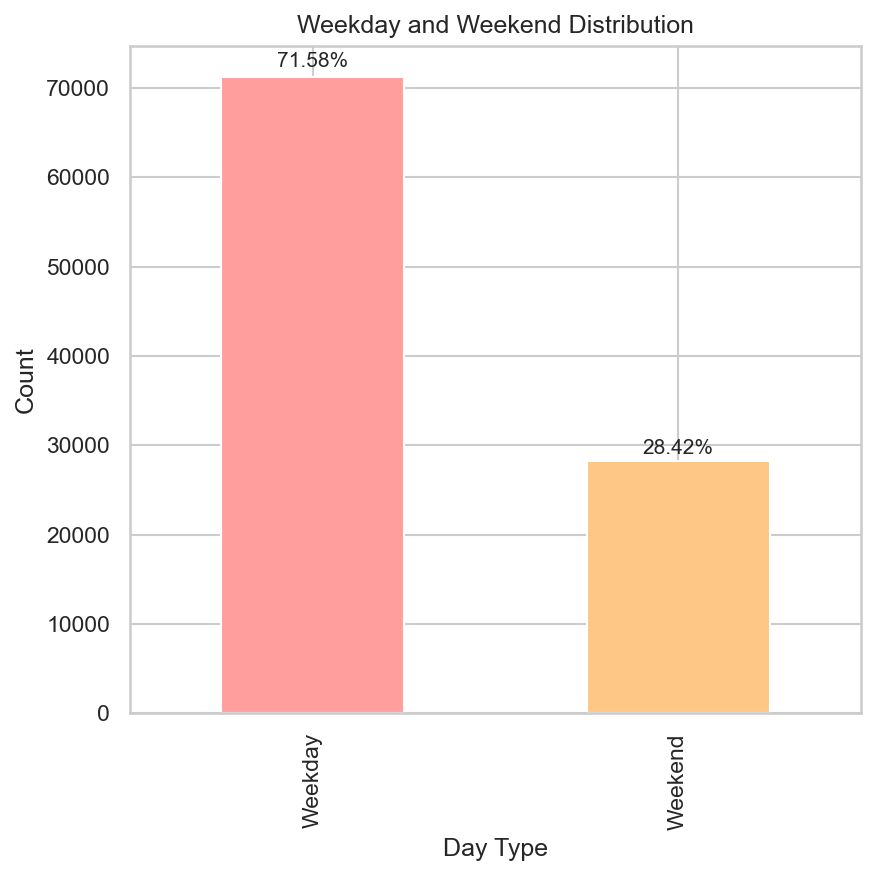

Mode of is_weekday: Weekday


In [58]:
# Visualize data.
df['is_weekday_label'] = df['is_weekday'].map({0: 'Weekend', 1: 'Weekday'})

counts = df['is_weekday_label'].value_counts().sort_index()
total = counts.sum()
percentages = counts / total * 100

plt.figure(figsize=(6,6), dpi=150)
bars = counts.plot(kind='bar', color=[color1, color2])
plt.title('Weekday and Weekend Distribution')
plt.xlabel('Day Type')
plt.ylabel('Count')

for bar, pct in zip(bars.patches, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height * 1.01, f'{pct:.2f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('dataset_frequency_and_distribution_analysis/is_weekday_distribution.png', dpi=150)
plt.show()

print(f"Mode of is_weekday: {df['is_weekday_label'].mode().iloc[0]}")

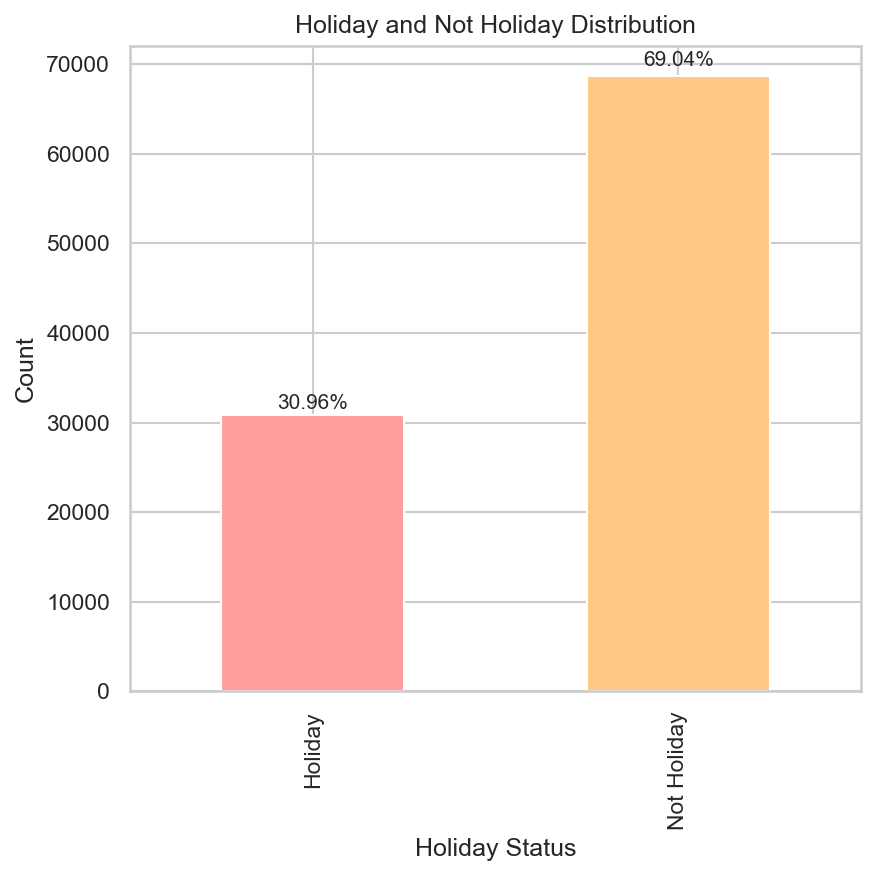

Mode of is_holiday: Not Holiday


In [59]:
# Visualize data.
df['is_holiday_label'] = df['is_holiday'].map({0: 'Not Holiday', 1: 'Holiday'})

counts = df['is_holiday_label'].value_counts().sort_index()
total = counts.sum()
percentages = counts / total * 100

plt.figure(figsize=(6,6), dpi=150)
bars = counts.plot(kind='bar', color=[color1, color2])
plt.title('Holiday and Not Holiday Distribution')
plt.xlabel('Holiday Status')
plt.ylabel('Count')

for bar, pct in zip(bars.patches, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height * 1.01, f'{pct:.2f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('dataset_frequency_and_distribution_analysis/is_holiday_distribution.png', dpi=150)
plt.show()

print(f"Mode of is_holiday: {df['is_holiday_label'].mode().iloc[0]}")


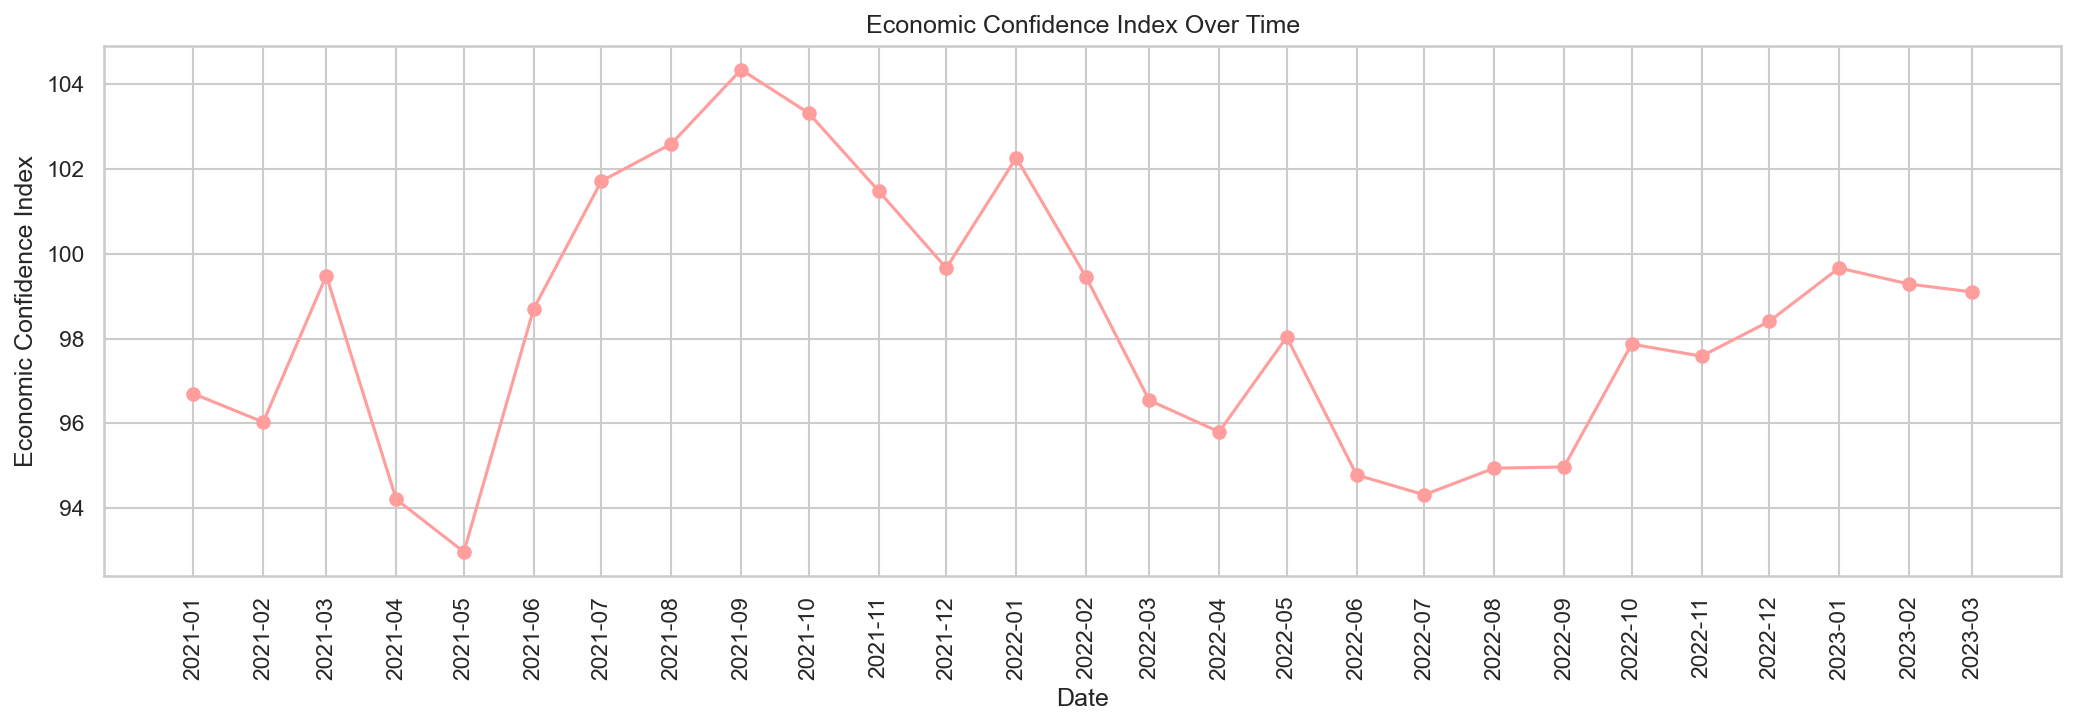

Statistics for Economic Confidence Index:
 Min: 92.9693
 Max: 104.3462
 Mean: 98.3062
 Median: 98.4058
 Mode: 92.9693
 Standard Deviation: 3.0348


In [60]:
# Visualize data.
df_unique = df.drop_duplicates(subset=["Year", "Month"]).sort_values(by=["Year", "Month"])
df_unique["Date"] = pd.to_datetime(df_unique["Year"].astype(str) + "-" + df_unique["Month"].astype(str) + "-01")
df_unique["Year_Month"] = df_unique["Year"].astype(str) + "-" + df_unique["Month"].astype(str).str.zfill(2)

plt.figure(figsize=(14, 5), dpi=150)
plt.plot(df_unique["Date"], df_unique["Econ_Conf"], marker='o', linestyle='-', color=color1)

plt.title('Economic Confidence Index Over Time')
plt.xlabel('Date')
plt.ylabel('Economic Confidence Index')
plt.grid(True)

plt.xticks(ticks=df_unique["Date"], labels=df_unique["Year_Month"], rotation=90)
plt.tight_layout()
plt.savefig('dataset_frequency_and_distribution_analysis/economic_confidence_index_lineplot.png', dpi=150)
plt.show()

print(f"Statistics for Economic Confidence Index:")
print(f" Min: {df_unique['Econ_Conf'].min():.4f}")
print(f" Max: {df_unique['Econ_Conf'].max():.4f}")
print(f" Mean: {df_unique['Econ_Conf'].mean():.4f}")
print(f" Median: {df_unique['Econ_Conf'].median():.4f}")
print(f" Mode: {df_unique['Econ_Conf'].mode().iloc[0]:.4f}")
print(f" Standard Deviation: {df_unique['Econ_Conf'].std():.4f}")


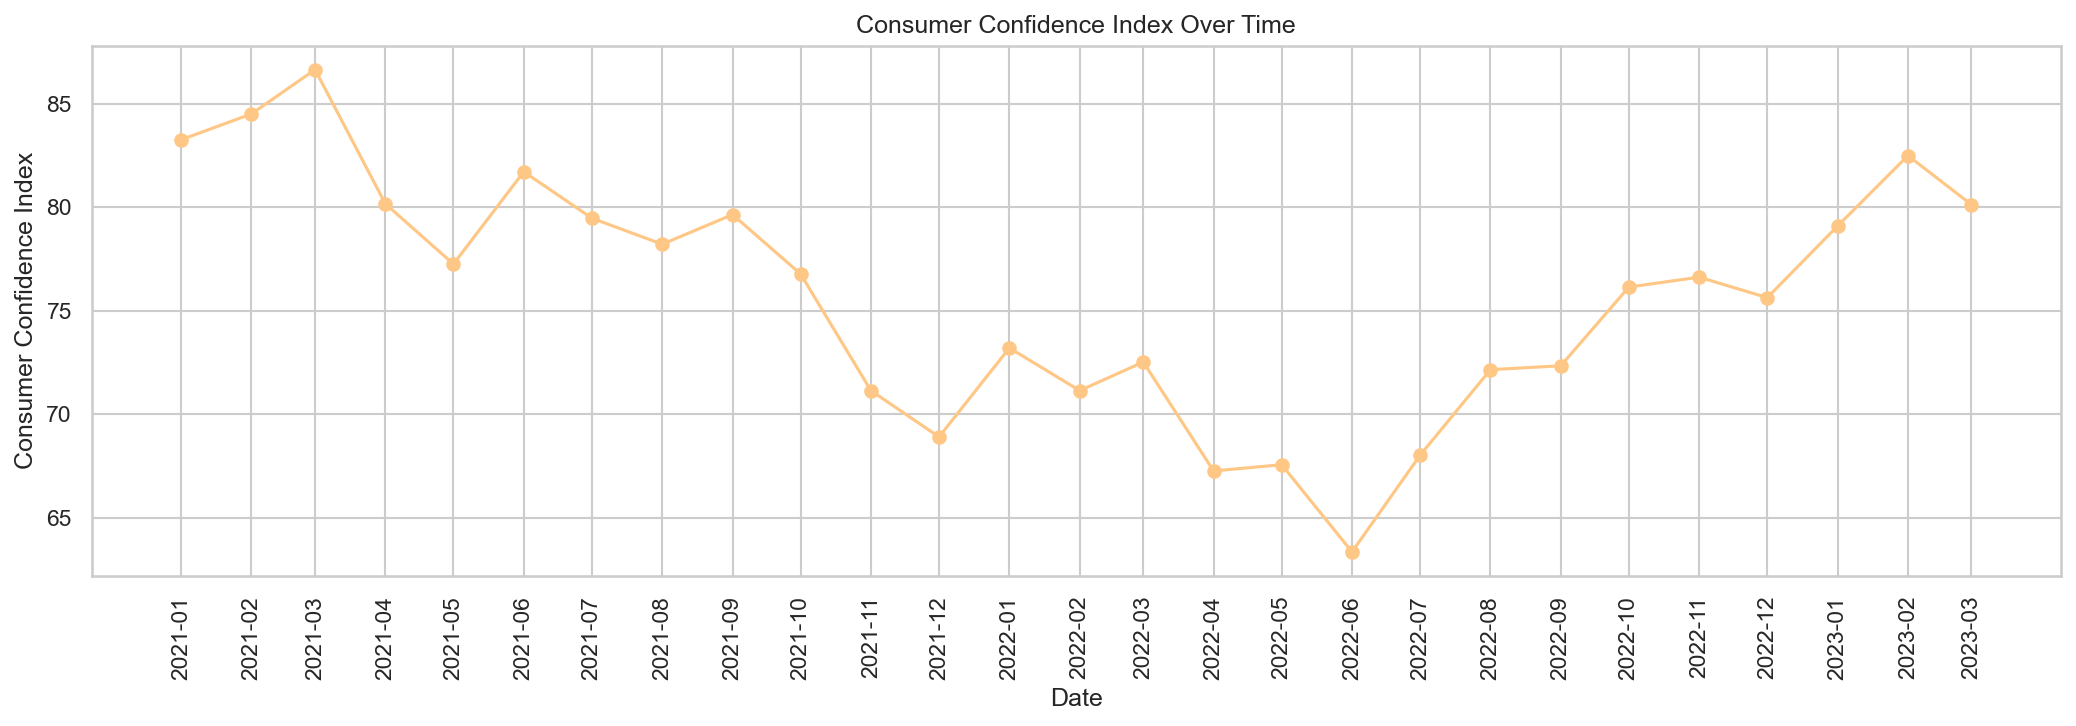

Statistics for Consumer Confidence Index:
 Min: 63.3600
 Max: 86.6538
 Mean: 75.7616
 Median: 76.6300
 Mode: 63.3600
 Standard Deviation: 5.9004


In [61]:
# Visualize data.
df_unique = df.drop_duplicates(subset=["Year", "Month"]).sort_values(by=["Year", "Month"])
df_unique["Date"] = pd.to_datetime(df_unique["Year"].astype(str) + "-" + df_unique["Month"].astype(str) + "-01")
df_unique["Year_Month"] = df_unique["Year"].astype(str) + "-" + df_unique["Month"].astype(str).str.zfill(2)

plt.figure(figsize=(14, 5), dpi=150)
plt.plot(df_unique["Date"], df_unique["Cons_Conf"], marker='o', linestyle='-', color=color2)

plt.title('Consumer Confidence Index Over Time')
plt.xlabel('Date')
plt.ylabel('Consumer Confidence Index')
plt.grid(True)

plt.xticks(ticks=df_unique["Date"], labels=df_unique["Year_Month"], rotation=90)
plt.tight_layout()
plt.savefig('dataset_frequency_and_distribution_analysis/consumer_confidence_index_lineplot.png', dpi=150)
plt.show()

print(f"Statistics for Consumer Confidence Index:")
print(f" Min: {df_unique['Cons_Conf'].min():.4f}")
print(f" Max: {df_unique['Cons_Conf'].max():.4f}")
print(f" Mean: {df_unique['Cons_Conf'].mean():.4f}")
print(f" Median: {df_unique['Cons_Conf'].median():.4f}")
print(f" Mode: {df_unique['Cons_Conf'].mode().iloc[0]:.4f}")
print(f" Standard Deviation: {df_unique['Cons_Conf'].std():.4f}")


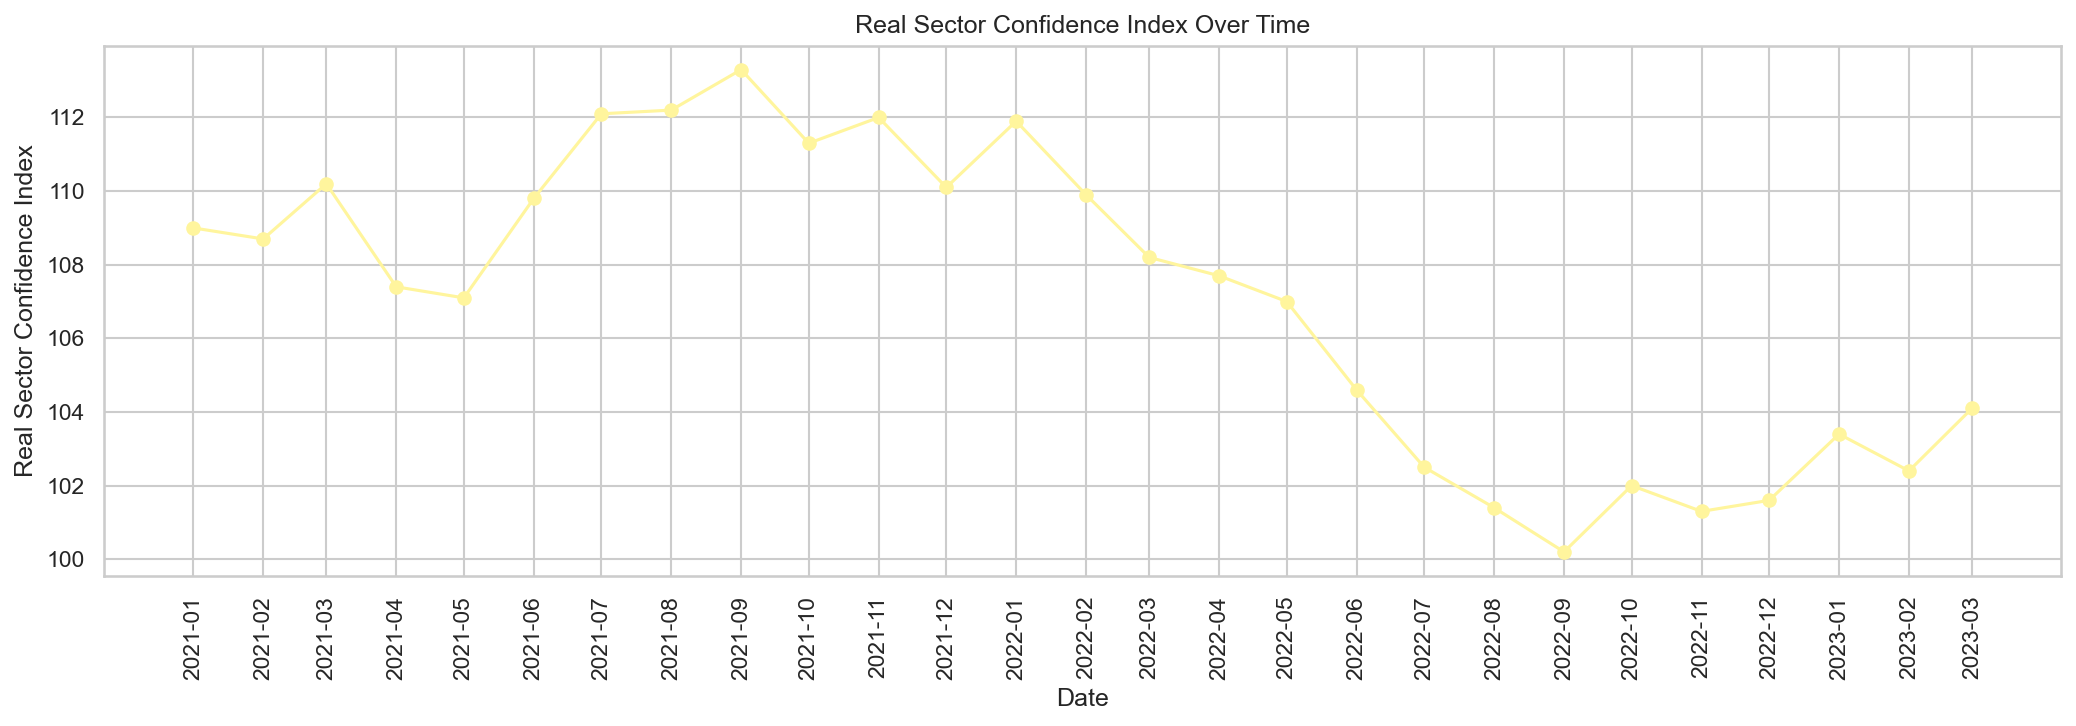

Statistics for Real Sector Confidence Index:
 Min: 100.2000
 Max: 113.3000
 Mean: 107.0889
 Median: 107.7000
 Mode: 100.2000
 Standard Deviation: 4.1040


In [62]:
# Visualize data.
df_unique = df.drop_duplicates(subset=["Year", "Month"]).sort_values(by=["Year", "Month"])
df_unique["Date"] = pd.to_datetime(df_unique["Year"].astype(str) + "-" + df_unique["Month"].astype(str) + "-01")
df_unique["Year_Month"] = df_unique["Year"].astype(str) + "-" + df_unique["Month"].astype(str).str.zfill(2)

plt.figure(figsize=(14, 5), dpi=150)
plt.plot(df_unique["Date"], df_unique["RealSec_Conf"], marker='o', linestyle='-', color=color3)

plt.title('Real Sector Confidence Index Over Time')
plt.xlabel('Date')
plt.ylabel('Real Sector Confidence Index')
plt.grid(True)

plt.xticks(ticks=df_unique["Date"], labels=df_unique["Year_Month"], rotation=90)
plt.tight_layout()
plt.savefig('dataset_frequency_and_distribution_analysis/real_sector_confidence_index_lineplot.png', dpi=150)
plt.show()

print(f"Statistics for Real Sector Confidence Index:")
print(f" Min: {df_unique['RealSec_Conf'].min():.4f}")
print(f" Max: {df_unique['RealSec_Conf'].max():.4f}")
print(f" Mean: {df_unique['RealSec_Conf'].mean():.4f}")
print(f" Median: {df_unique['RealSec_Conf'].median():.4f}")
print(f" Mode: {df_unique['RealSec_Conf'].mode().iloc[0]:.4f}")
print(f" Standard Deviation: {df_unique['RealSec_Conf'].std():.4f}")


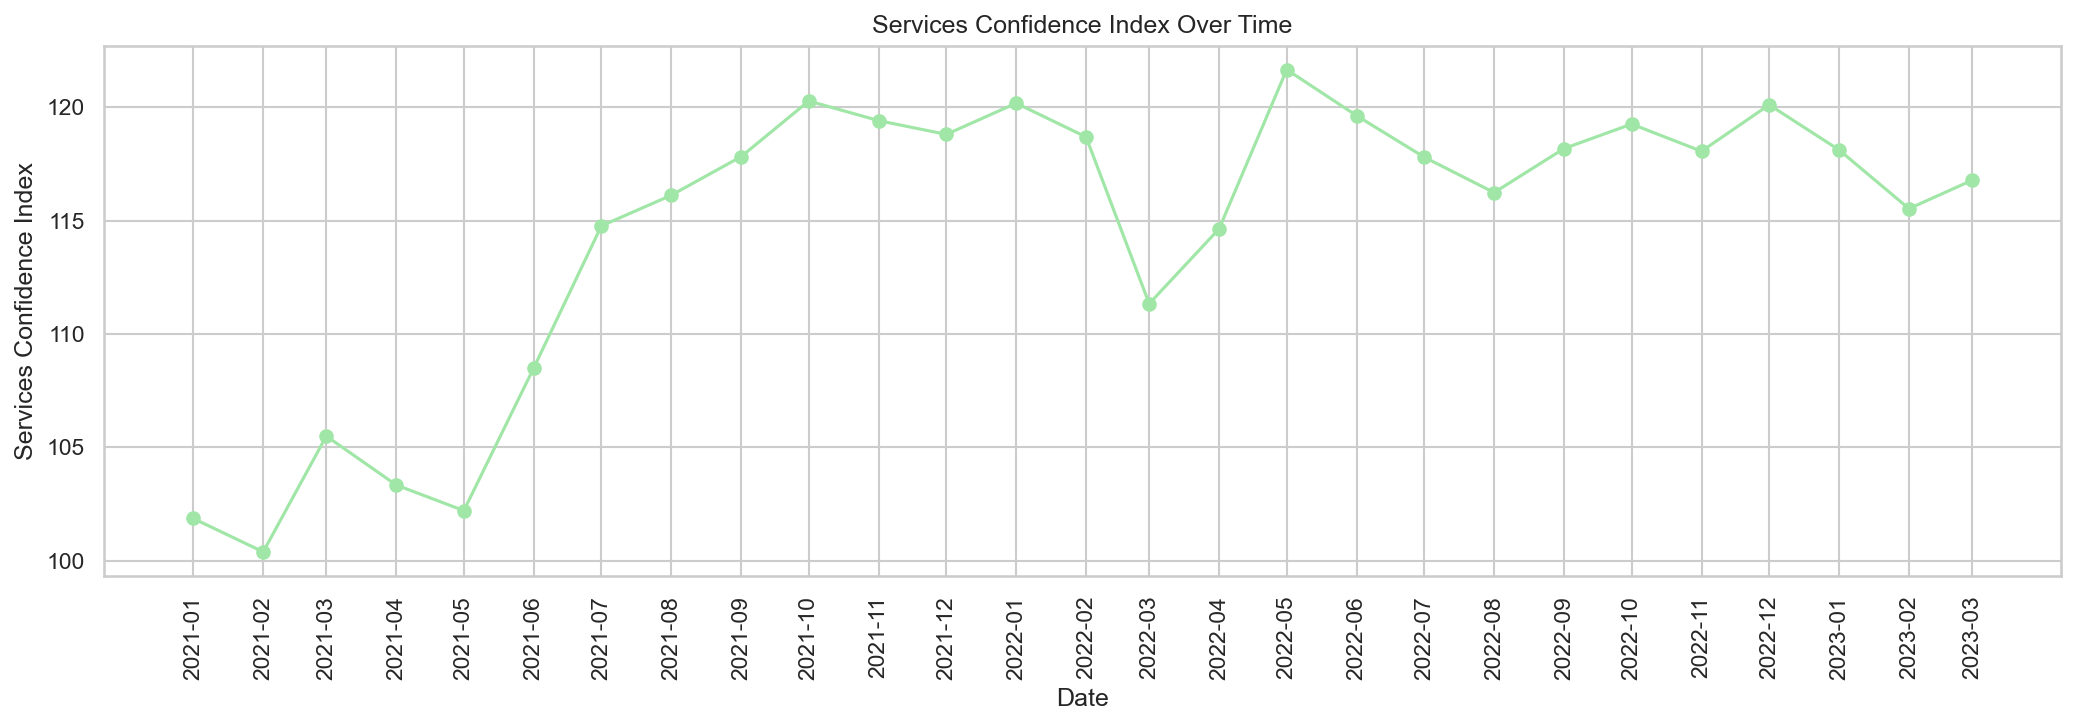

Statistics for Services Confidence Index:
 Min: 100.3978
 Max: 121.6600
 Mean: 114.6396
 Median: 117.8000
 Mode: 100.3978
 Standard Deviation: 6.4771


In [63]:
# Visualize data.
df_unique = df.drop_duplicates(subset=["Year", "Month"]).sort_values(by=["Year", "Month"])
df_unique["Date"] = pd.to_datetime(df_unique["Year"].astype(str) + "-" + df_unique["Month"].astype(str) + "-01")
df_unique["Year_Month"] = df_unique["Year"].astype(str) + "-" + df_unique["Month"].astype(str).str.zfill(2)

plt.figure(figsize=(14, 5), dpi=150)
plt.plot(df_unique["Date"], df_unique["Serv_Conf"], marker='o', linestyle='-', color=color4)

plt.title('Services Confidence Index Over Time')
plt.xlabel('Date')
plt.ylabel('Services Confidence Index')
plt.grid(True)

plt.xticks(ticks=df_unique["Date"], labels=df_unique["Year_Month"], rotation=90)
plt.tight_layout()
plt.savefig('dataset_frequency_and_distribution_analysis/services_confidence_index_lineplot.png', dpi=150)
plt.show()

print(f"Statistics for Services Confidence Index:")
print(f" Min: {df_unique['Serv_Conf'].min():.4f}")
print(f" Max: {df_unique['Serv_Conf'].max():.4f}")
print(f" Mean: {df_unique['Serv_Conf'].mean():.4f}")
print(f" Median: {df_unique['Serv_Conf'].median():.4f}")
print(f" Mode: {df_unique['Serv_Conf'].mode().iloc[0]:.4f}")
print(f" Standard Deviation: {df_unique['Serv_Conf'].std():.4f}")


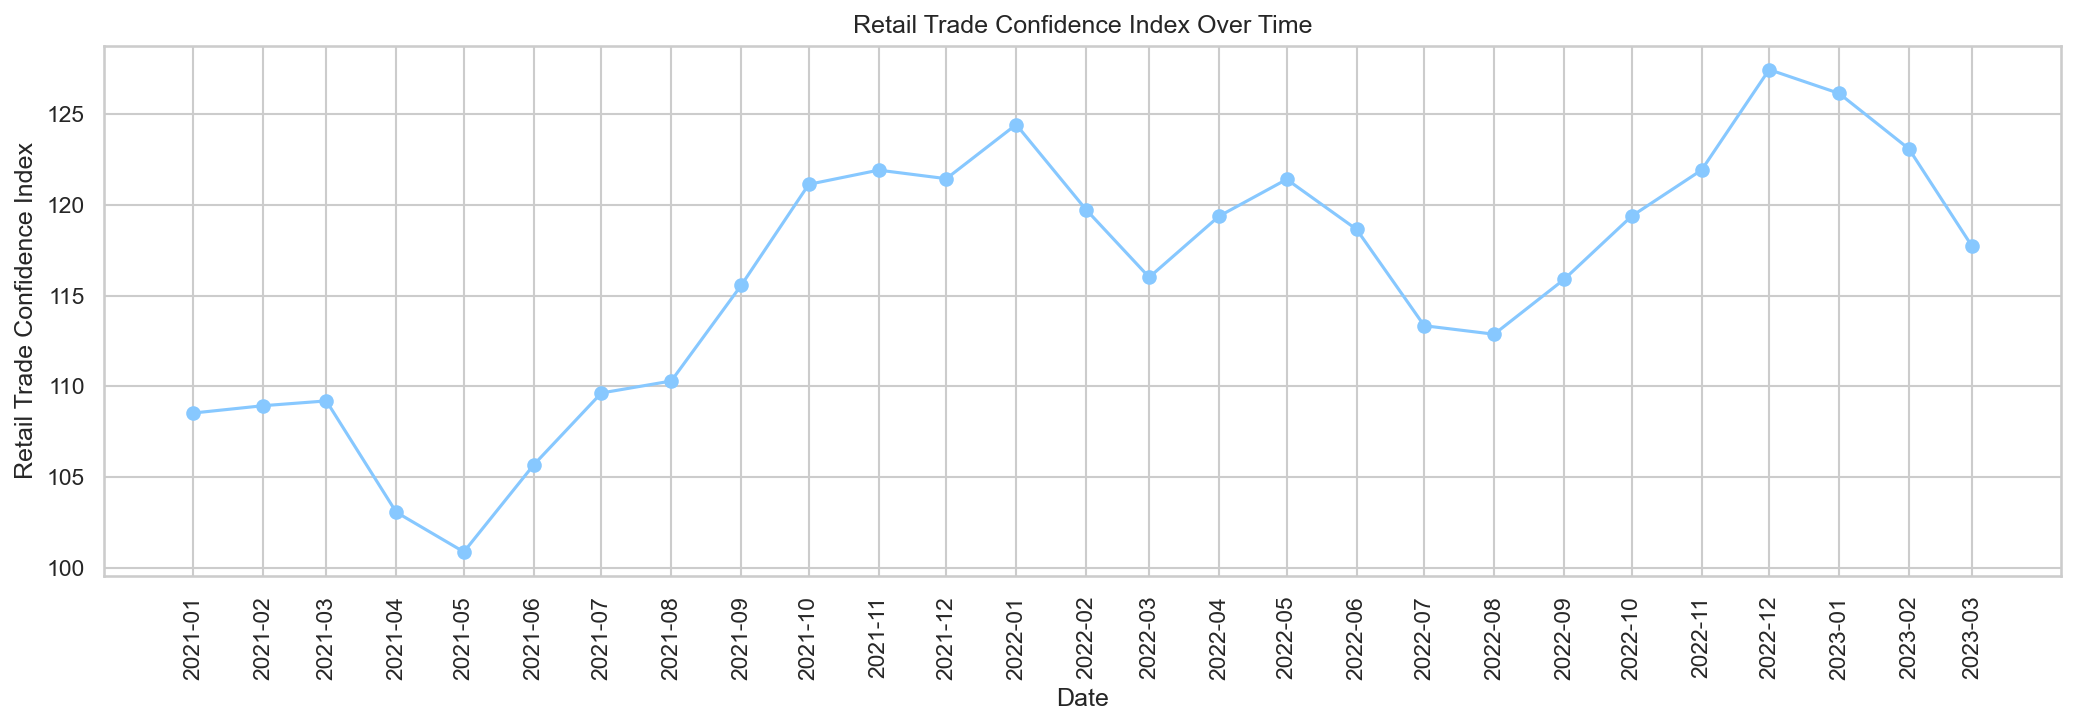

Statistics for Retail Trade Confidence Index:
 Min: 100.8794
 Max: 127.4700
 Mean: 116.0717
 Median: 117.7300
 Mode: 119.3900
 Standard Deviation: 7.0801


In [64]:
# Visualize data.
df_unique = df.drop_duplicates(subset=["Year", "Month"]).sort_values(by=["Year", "Month"])
df_unique["Date"] = pd.to_datetime(df_unique["Year"].astype(str) + "-" + df_unique["Month"].astype(str) + "-01")
df_unique["Year_Month"] = df_unique["Year"].astype(str) + "-" + df_unique["Month"].astype(str).str.zfill(2)

plt.figure(figsize=(14, 5), dpi=150)
plt.plot(df_unique["Date"], df_unique["Retail_Conf"], marker='o', linestyle='-', color=color5)

plt.title('Retail Trade Confidence Index Over Time')
plt.xlabel('Date')
plt.ylabel('Retail Trade Confidence Index')
plt.grid(True)

plt.xticks(ticks=df_unique["Date"], labels=df_unique["Year_Month"], rotation=90)
plt.tight_layout()
plt.savefig('dataset_frequency_and_distribution_analysis/retail_trade_confidence_index_lineplot.png', dpi=150)
plt.show()

print(f"Statistics for Retail Trade Confidence Index:")
print(f" Min: {df_unique['Retail_Conf'].min():.4f}")
print(f" Max: {df_unique['Retail_Conf'].max():.4f}")
print(f" Mean: {df_unique['Retail_Conf'].mean():.4f}")
print(f" Median: {df_unique['Retail_Conf'].median():.4f}")
print(f" Mode: {df_unique['Retail_Conf'].mode().iloc[0]:.4f}")
print(f" Standard Deviation: {df_unique['Retail_Conf'].std():.4f}")


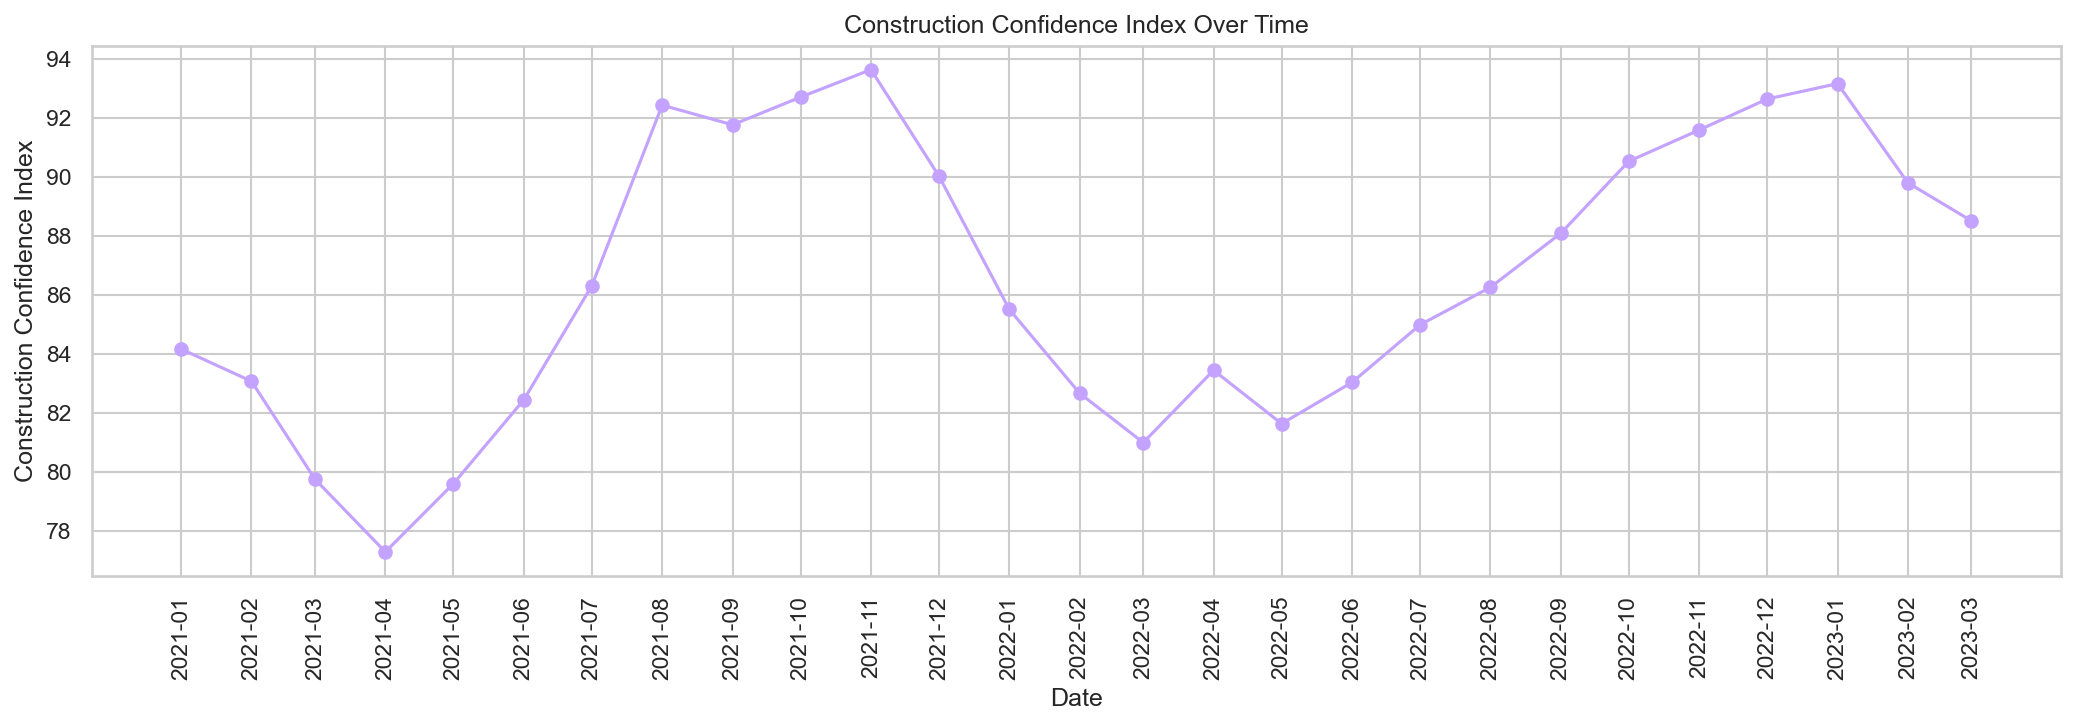

Statistics for Construction Confidence Index:
 Min: 77.2976
 Max: 93.6347
 Mean: 86.5225
 Median: 86.2600
 Mode: 77.2976
 Standard Deviation: 4.8466


In [65]:
# Visualize data.
df_unique = df.drop_duplicates(subset=["Year", "Month"]).sort_values(by=["Year", "Month"])
df_unique["Date"] = pd.to_datetime(df_unique["Year"].astype(str) + "-" + df_unique["Month"].astype(str) + "-01")
df_unique["Year_Month"] = df_unique["Year"].astype(str) + "-" + df_unique["Month"].astype(str).str.zfill(2)

plt.figure(figsize=(14, 5), dpi=150)
plt.plot(df_unique["Date"], df_unique["Constr_Conf"], marker='o', linestyle='-', color=color6)

plt.title('Construction Confidence Index Over Time')
plt.xlabel('Date')
plt.ylabel('Construction Confidence Index')
plt.grid(True)

plt.xticks(ticks=df_unique["Date"], labels=df_unique["Year_Month"], rotation=90)
plt.tight_layout()
plt.savefig('dataset_frequency_and_distribution_analysis/construction_confidence_index_lineplot.png', dpi=150)
plt.show()

print(f"Statistics for Construction Confidence Index:")
print(f" Min: {df_unique['Constr_Conf'].min():.4f}")
print(f" Max: {df_unique['Constr_Conf'].max():.4f}")
print(f" Mean: {df_unique['Constr_Conf'].mean():.4f}")
print(f" Median: {df_unique['Constr_Conf'].median():.4f}")
print(f" Mode: {df_unique['Constr_Conf'].mode().iloc[0]:.4f}")
print(f" Standard Deviation: {df_unique['Constr_Conf'].std():.4f}")


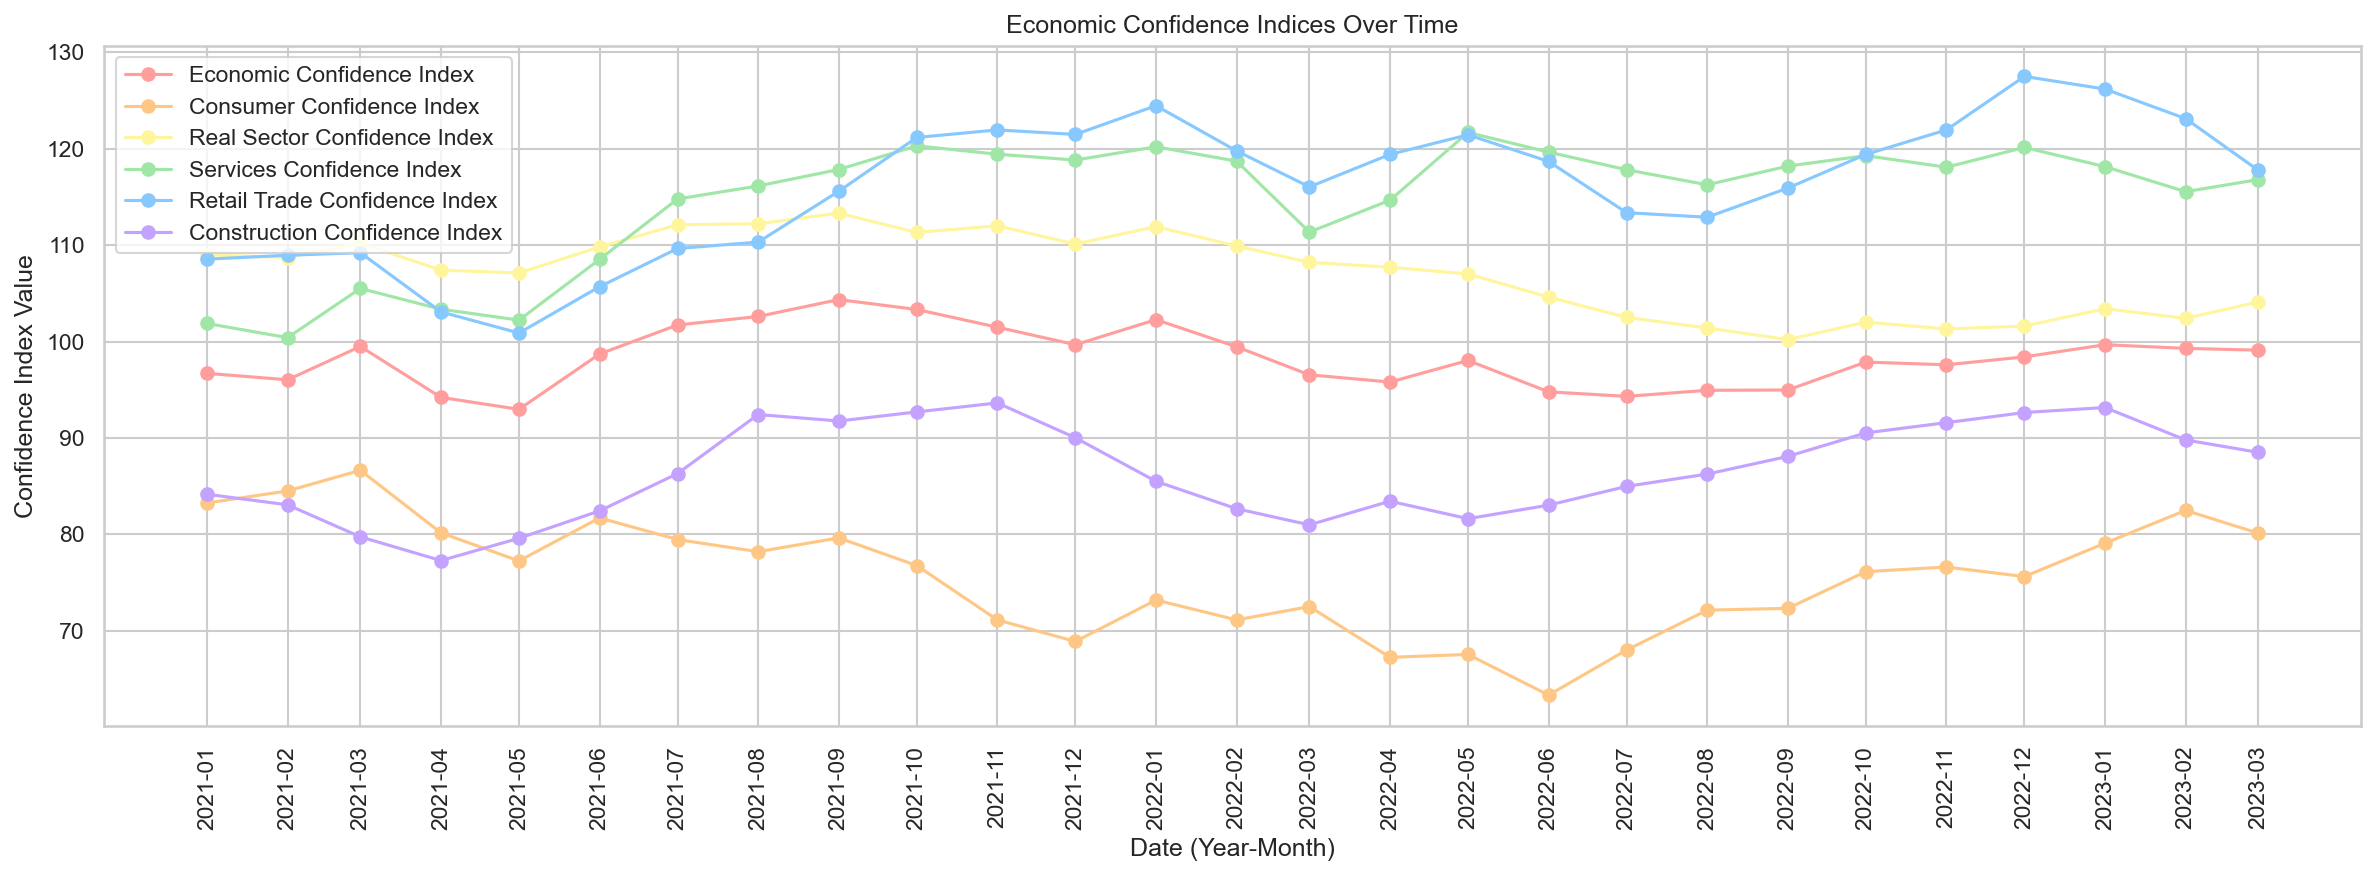

In [66]:
# Visualize data.
df_unique = df.drop_duplicates(subset=["Year", "Month"]).sort_values(by=["Year", "Month"])
df_unique["Date"] = pd.to_datetime(df_unique["Year"].astype(str) + "-" + df_unique["Month"].astype(str) + "-01")
df_unique["Year_Month"] = df_unique["Year"].astype(str) + "-" + df_unique["Month"].astype(str).str.zfill(2)

plt.figure(figsize=(16, 6), dpi=150)

plt.plot(df_unique["Date"], df_unique["Econ_Conf"], marker='o', linestyle='-', color=color1, label='Economic Confidence Index')
plt.plot(df_unique["Date"], df_unique["Cons_Conf"], marker='o', linestyle='-', color=color2, label='Consumer Confidence Index')
plt.plot(df_unique["Date"], df_unique["RealSec_Conf"], marker='o', linestyle='-', color=color3, label='Real Sector Confidence Index')
plt.plot(df_unique["Date"], df_unique["Serv_Conf"], marker='o', linestyle='-', color=color4, label='Services Confidence Index')
plt.plot(df_unique["Date"], df_unique["Retail_Conf"], marker='o', linestyle='-', color=color5, label='Retail Trade Confidence Index')
plt.plot(df_unique["Date"], df_unique["Constr_Conf"], marker='o', linestyle='-', color=color6, label='Construction Confidence Index')

plt.title('Economic Confidence Indices Over Time')
plt.xlabel('Date (Year-Month)')
plt.ylabel('Confidence Index Value')
plt.grid(True)

plt.xticks(ticks=df_unique["Date"], labels=df_unique["Year_Month"], rotation=90)
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('dataset_frequency_and_distribution_analysis/all_confidence_indices_lineplot.png', dpi=150)
plt.show()


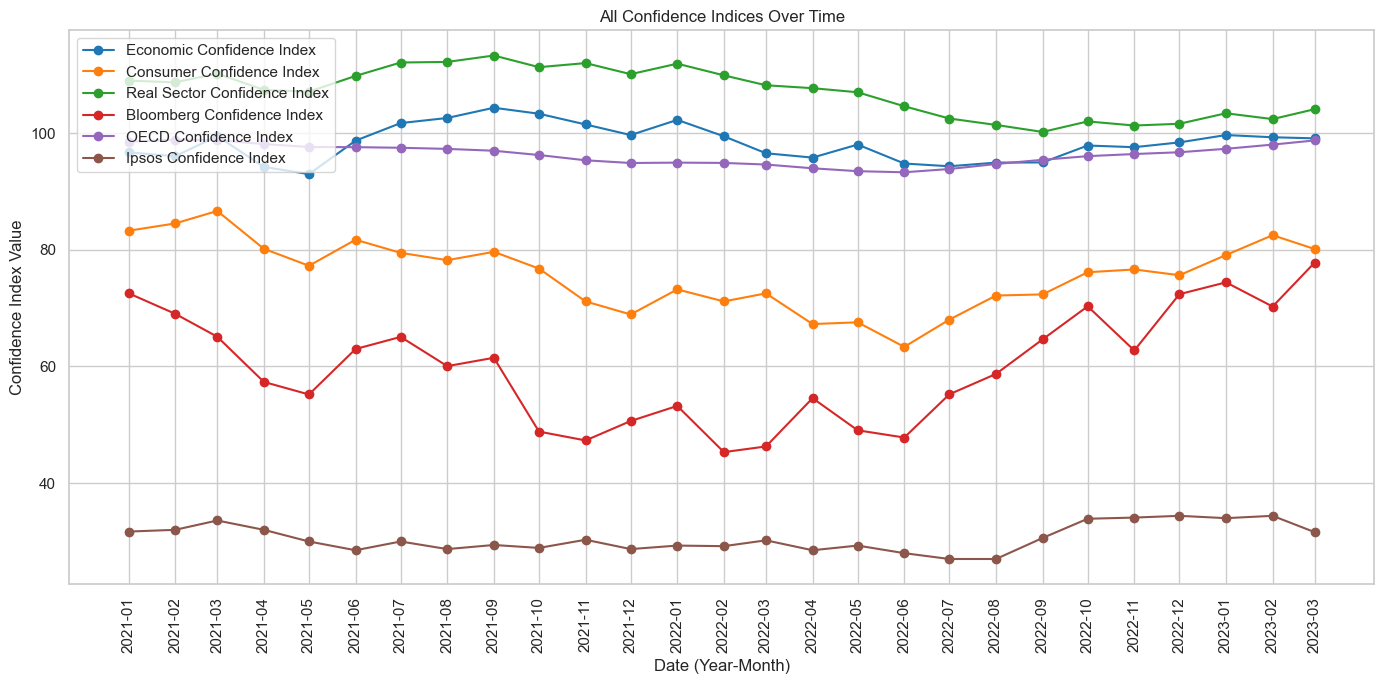

In [7]:
# Ensure invoice_date is datetime
df["invoice_date"] = pd.to_datetime(df["invoice_date"], errors="coerce")

# Extract Year-Month
df["Year_Month"] = df["invoice_date"].dt.to_period("M").astype(str)

# Group by Year-Month and compute average
monthly_df = df.groupby("Year_Month").mean(numeric_only=True).reset_index()

# Create datetime column for plotting
monthly_df["Date"] = pd.to_datetime(monthly_df["Year_Month"])

# Custom colors
color1 = "#1f77b4"
color2 = "#ff7f0e"
color3 = "#2ca02c"
color4 = "#d62728"
color5 = "#9467bd"
color6 = "#8c564b"

# Create plot
plt.figure(figsize=(14, 7))

plt.plot(monthly_df["Date"], monthly_df["Econ_Conf"], marker='o', linestyle='-', color=color1, label='Economic Confidence Index')
plt.plot(monthly_df["Date"], monthly_df["Cons_Conf"], marker='o', linestyle='-', color=color2, label='Consumer Confidence Index')
plt.plot(monthly_df["Date"], monthly_df["RealSec_Conf"], marker='o', linestyle='-', color=color3, label='Real Sector Confidence Index')
plt.plot(monthly_df["Date"], monthly_df["bloomberg_confidence"], marker='o', linestyle='-', color=color4, label='Bloomberg Confidence Index')
plt.plot(monthly_df["Date"], monthly_df["oecd_confidence"], marker='o', linestyle='-', color=color5, label='OECD Confidence Index')
plt.plot(monthly_df["Date"], monthly_df["ipsos_confidence"], marker='o', linestyle='-', color=color6, label='Ipsos Confidence Index')

plt.title('All Confidence Indices Over Time')
plt.xlabel('Date (Year-Month)')
plt.ylabel('Confidence Index Value')
plt.grid(True)

plt.xticks(
    ticks=monthly_df["Date"],
    labels=monthly_df["Year_Month"],
    rotation=90
)

plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('dataset_frequency_and_distribution_analysis/all_confidence_indices_lineplot.png', dpi=150)
plt.show()
